In [1]:
import numpy as np
from datetime import datetime as dt  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
secinday = 24*3600
palette=sns.color_palette("colorblind")
darkblue = palette[0]
lightblue = palette[4]
purple = palette[9]

In [2]:
up = 0#30 #m
#Import head measurement for JEME
jeme = pd.read_csv('JEME_HYD_2017.csv', index_col=0, parse_dates=True)
#jeme = jeme.dropna()
jeme['ob'] = (jeme.water_level_above_bed+up)/500

#Import head measurement for PIRA
pira = pd.read_csv('PIRA_HYD_2018.csv', index_col=0, parse_dates=True)
#pira = pira.dropna()
pira['ob'] = pira.water_level_above_bed/500

#import melt model inputs
weather_LC = pd.read_csv('LOWC_WEA_2017_2018.csv', index_col=0, parse_dates=True)




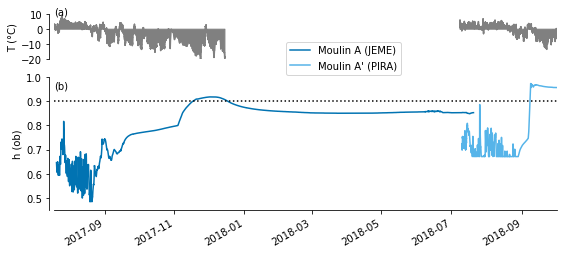

In [7]:
fig, ax = plt.subplots(2,figsize=(9,4), gridspec_kw={'height_ratios':[1,3]})

#xlim = 200,670
xlim=(['2017-07-19','2018-10-01'])


ax[0].plot(weather_LC.index,weather_LC.air_temp, color='grey')
ax[0].fill_between(weather_LC.index,0,weather_LC.air_temp,color='grey')

ax[0].set_ylabel('T (°C)')
ax[0].set_ylim(-20,10)
ax[0].set_xlim(xlim)
ax[0].set_yticks([-20,-10,0,10])
ax[0].spines['left'].set_bounds([-20,10])

ax[1].plot(jeme.index,jeme.ob, label='Moulin A (JEME)', color=darkblue)
ax[1].plot(pira.index,pira.ob, label="Moulin A' (PIRA)", color=purple)


ax[1].set_xlim(xlim)
ax[1].set_ylim(0.45,1)
ax[1].axhline(y=0.9,color='black', linestyle=':')
ax[1].set_ylabel('h (ob)')

#ax[1].set_xticks([200,250,300,365+1, 365+50, 365+100, 365+150, 365+200, 365+250])#400-5,450-5,500-5,550-5,600-5, 650-5])
#ax[1].set_xticklabels([200,250,300,0,50,100,150,100,250])

#ax[1].set_xlabel('Day of year 2017 and 2018')
ax[1].set_ylabel('h (ob)')
ax[1].legend(bbox_to_anchor=(0.7,1.3))

sns.despine(ax=ax[0], bottom=True, offset=(5,0))
sns.despine(ax=ax[1], bottom=False, offset=(5,0))
ax[0].tick_params(bottom=False, labelbottom=False)

ax[0].text('2017-07-19',10,'(a)',fontsize=10)
ax[1].text('2017-07-19',0.95,'(b)',fontsize=10)

# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax[1].fmt_xdata = mdates.DateFormatter('%y-%m-%d')


plt.savefig('moulin_closure.pdf')

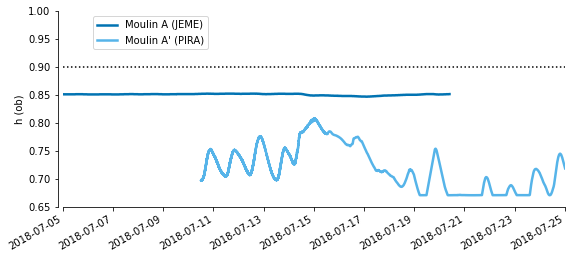

In [8]:
fig, ax = plt.subplots(figsize=(9,4))

#xlim = 200,670
xlim=(['2018-07-05','2018-07-25'])


ax.plot(jeme.index,jeme.ob, label='Moulin A (JEME)', color=darkblue, linewidth=2.5)
ax.plot(pira.index,pira.ob, label="Moulin A' (PIRA)", color=purple, linewidth=2.5)


ax.set_xlim(xlim)
ax.set_ylim(0.65,1)
ax.axhline(y=0.9,color='black', linestyle=':')
ax.set_ylabel('h (ob)')


ax.set_ylabel('h (ob)')
ax.legend(bbox_to_anchor=(0.3,1))

sns.despine(ax=ax, offset=(5,0))



# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%y-%m-%d')


plt.savefig('moulin_closure_zoomin.pdf')

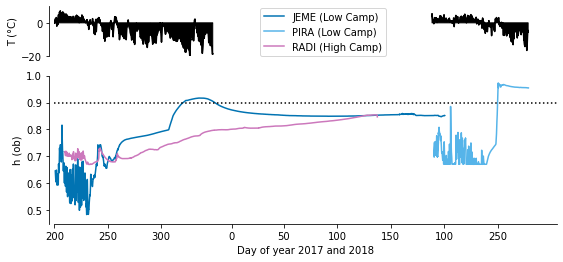

In [18]:
fig, ax = plt.subplots(2,figsize=(9,4), gridspec_kw={'height_ratios':[1,3]})

xlim = 200,670


ax[0].plot(weather_LC.DOY,weather_LC.Temp, color='black')
ax[0].fill_between(weather_LC.DOY.to_numpy(),0,weather_LC.Temp.to_numpy(),color='black')
#ax[0].plot(weather_HC.DOY,weather_HC.Temp, color='black')
#ax[0].fill_between(weather_HC.DOY.to_numpy(),0,weather_HC.Temp.to_numpy(),color='lightgrey')
ax[0].set_ylabel('T (°C)')
ax[0].set_ylim(-20,10)
ax[0].set_xlim(xlim)
#ax[0].set_yticks([0,4,8])
ax[0].spines['left'].set_bounds([-20,10])

ax[1].plot(jeme.doy,jeme.ob, label='JEME (Low Camp)', color=darkblue)
ax[1].plot(pira.doy+365,pira.ob, label='PIRA (Low Camp)', color=purple)
ax[1].plot(radi.doy,radi.ob, label='RADI (High Camp)', color=lightblue)

ax[1].set_xlim(xlim)
ax[1].set_ylim(0.45,1)
ax[1].axhline(y=0.9,color='black', linestyle=':')
ax[1].set_ylabel('h (ob)')

ax[1].set_xticks([200,250,300,365+1, 365+50, 365+100, 365+150, 365+200, 365+250])#400-5,450-5,500-5,550-5,600-5, 650-5])
ax[1].set_xticklabels([200,250,300,0,50,100,150,100,250])

ax[1].set_xlabel('Day of year 2017 and 2018')
ax[1].set_ylabel('h (ob)')
ax[1].legend(bbox_to_anchor=(0.4,1.1))

sns.despine(ax=ax[0], bottom=True, offset=(5,0))
sns.despine(ax=ax[1], bottom=False, offset=(5,0))
ax[0].tick_params(bottom=False, labelbottom=False)

plt.savefig('moulin_closure.pdf')

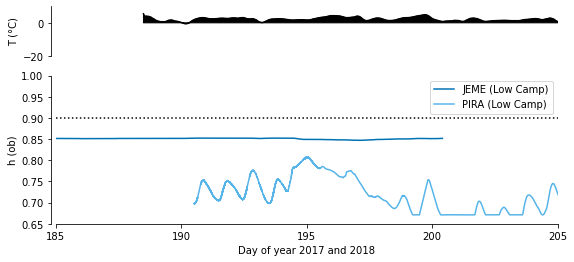

In [19]:
fig, ax = plt.subplots(2,figsize=(9,4), gridspec_kw={'height_ratios':[1,3]})

#xlim = 555,570
xlim = 365+185,365+205


ax[0].plot(weather_LC.DOY,weather_LC.Temp, color='black')
ax[0].fill_between(weather_LC.DOY.to_numpy(),0,weather_LC.Temp.to_numpy(),color='black')
#ax[0].plot(weather_HC.DOY,weather_HC.Temp, color='black')
#ax[0].fill_between(weather_HC.DOY.to_numpy(),0,weather_HC.Temp.to_numpy(),color='lightgrey')
ax[0].set_ylabel('T (°C)')
ax[0].set_ylim(-20,10)
ax[0].set_xlim(xlim)
#ax[0].set_yticks([0,4,8])
ax[0].spines['left'].set_bounds([-20,10])

ax[1].plot(jeme.doy,jeme.ob, label='JEME (Low Camp)', color=darkblue)
ax[1].plot(pira.doy+365,pira.ob, label='PIRA (Low Camp)', color=purple)
#ax[1].plot(radi.doy,radi.ob, label='RADI (High Camp)', color=lightblue)

ax[1].set_xlim(xlim)
ax[1].set_ylim(0.65,1)
ax[1].axhline(y=0.9,color='black', linestyle=':')
ax[1].set_ylabel('h (ob)')

ax[1].set_xticks([ 365+185, 365+190, 365+195, 365+200, 365+205])#400-5,450-5,500-5,550-5,600-5, 650-5])
ax[1].set_xticklabels([185,190,195,200,205])

ax[1].set_xlabel('Day of year 2017 and 2018')
ax[1].set_ylabel('h (ob)')
ax[1].legend()

sns.despine(ax=ax[0], bottom=True, offset=(5,0))
sns.despine(ax=ax[1], bottom=False, offset=(5,0))
ax[0].tick_params(bottom=False, labelbottom=False)

plt.savefig('moulin_closure_zoomin.pdf')

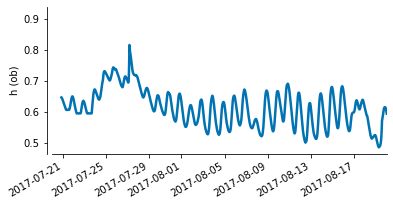

In [12]:
fig, ax = plt.subplots(figsize=(6,3))

#xlim = 200,670
xlim=(['2017-07-20','2017-08-20'])


ax.plot(jeme.index,jeme.ob, label='Moulin A (JEME)', color=darkblue, linewidth=2.5)
ax.set_xlim(xlim)
ax.set_ylabel('h (ob)')


sns.despine(ax=ax, offset=(5,0))



# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%y-%m-%d')


plt.savefig('jeme_head_ppt.png',dpi=300)